In [26]:
import pandas as pd
import numpy as np
import shinobi_behav
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut
from nilearn.plotting import plot_stat_map, show
import argparse
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import os.path as op
import os
from nilearn import plotting
import nilearn


path_to_data = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/'



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import seaborn as sns

def create_plot(df):
    """
    Creates a grid of bar plots from the given DataFrame without a legend.

    Parameters:
    - df: pandas DataFrame with the following columns:
        'label' : shinobi_annotation label (e.g., 'Label 1', 'Label 2', ...)
        'group' : group number within each label (1 to 4)
        'prediction': prediction number (1 to 3)
        'value': the value between 0 and 1 for the height of the bar
        'xticklabel_group': label for the x-axis tick for each group (e.g., 'sub-01', 'sub-02', ...)
        'bar_label': unique label for each bar (e.g., long words)
    Returns:
    - fig: matplotlib Figure object
    """
    # Get unique labels
    labels = df['label'].unique()
    n_labels = len(labels)

    # Set up figure and gridspec with increased vertical space between subplots
    fig = plt.figure(figsize=(12, 12))
    gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.6)

    # Use Set2 colormap from seaborn for turquoise and orange
    palette = sns.color_palette("Set2")
    turquoise = palette[0]  # Turquoise
    orange = palette[1]     # Orange

    for idx, label in enumerate(labels):
        row = idx % 4
        col = idx // 4
        ax = fig.add_subplot(gs[row, col])

        # Data for this label
        df_label = df[df['label'] == label]

        n_groups = df_label['group'].nunique()
        n_bars_per_group = df_label['prediction'].nunique()
        spacing = 1.5

        positions = []
        for g in range(n_groups):
            group_base = g * (n_bars_per_group + spacing)
            for b in range(n_bars_per_group):
                positions.append(group_base + b)

        # Heights of the bars
        df_label_sorted = df_label.sort_values(['group', 'prediction'])
        heights = df_label_sorted['value'].values
        bar_labels = df_label_sorted['bar_label'].values

        # Set colors for the bars
        bar_colors = [orange if bar_label in ['DOWN', 'HIT', 'HealthLoss', 'JUMP', 'Kill', 'LEFT', 'RIGHT'] else turquoise
                      for bar_label in bar_labels]

        # Create bars
        bars = ax.bar(positions, heights, color=bar_colors, width=0.8)

        # Adjust y-limit to provide space for labels
        ax.set_ylim(0, 1.2)
        ax.tick_params(axis='y', labelsize=14)

        # Annotate bars with bar labels
        for pos, height, bar_label in zip(positions, heights, bar_labels):
            color = 'red' if bar_label in ['DOWN', 'HIT', 'HealthLoss', 'JUMP', 'Kill', 'LEFT', 'RIGHT'] else 'black'
            fontweight = 'bold' if color == 'red' else 'normal'
            ax.text(pos, height + 0.05, bar_label, ha='center', va='bottom', fontsize=12, rotation=90, color=color, fontweight=fontweight)

        # Set x-ticks and labels at group centers
        xticks = [(g * (n_bars_per_group + spacing) + (n_bars_per_group - 1) / 2) for g in range(n_groups)]
        xticklabel_groups = df_label.drop_duplicates('group').sort_values('group')['xticklabel_group'].tolist()
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabel_groups, rotation=0, fontsize=14)
        ax.tick_params(axis='x', length=0)

        ax.set_title(label, fontsize=16, fontweight='bold', y=1.1)

        # Adjust x limits
        x_min = -1
        x_max = n_groups * (n_bars_per_group + spacing) - spacing + 1
        ax.set_xlim(x_min, x_max)

        # Remove y-ticks and labels above 1
        ax.set_yticks(np.linspace(0, 1, num=6))

        # Remove the spines for the current axis
        for spine in ax.spines.values():
            spine.set_visible(False)

    plt.tight_layout()
    return fig

sub = 'sub-06'
decoder_fname = f'{sub}_simple_decoder.pkl'
decoder_fpath = op.join(path_to_data, 'processed', 'mvpa_results_with_hcp', decoder_fname)

with open(decoder_fpath, 'rb') as f:
    file = pickle.load(f)
    decoder = file['decoder']
    contrast_label = file['contrast_label']
    confusion_matrices_dict = file['confusion_matrices_dict']
    actual_per_class_accuracies = file['actual_per_class_accuracies']
    #permuted_per_class_accuracies = file['permuted_per_class_accuracies']
    completed_permutations = file['completed_permutations']
    #permuted_labels_list = file['permuted_labels_list']
    p_values = file['p_values']


In [32]:
actual_per_class_accuracies
file['p_values']

{'DOWN': 0.0,
 'HIT': 0.0,
 'HealthLoss': 1.0,
 'JUMP': 0.0,
 'Kill': 0.0,
 'LEFT': 0.0,
 'RIGHT': 0.0,
 'cue': 0.1,
 'effects_interest': 0.0,
 'face': 0.0,
 'face-shape': 0.1,
 'left_foot': 0.0,
 'left_foot-avg': 1.0,
 'left_hand': 0.0,
 'left_hand-avg': 1.0,
 'match': 0.0,
 'math': 0.0,
 'math-story': 0.0,
 'mental': 0.0,
 'mental-random': 0.0,
 'punishment': 0.2,
 'punishment-reward': 0.3,
 'random': 0.1,
 'relational': 0.0,
 'relational-match': 0.2,
 'reward': 0.0,
 'reward-punishment': 1.0,
 'right_foot': 0.0,
 'right_foot-avg': 1.0,
 'right_hand': 0.0,
 'right_hand-avg': 1.0,
 'shape': 0.0,
 'shape-face': 0.1,
 'story': 0.0,
 'story-math': 0.0,
 'tongue': 0.0,
 'tongue-avg': 1.0}

dict_keys(['perm_array', 'class_list'])

/tmp/ipykernel_4138/3680682976.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


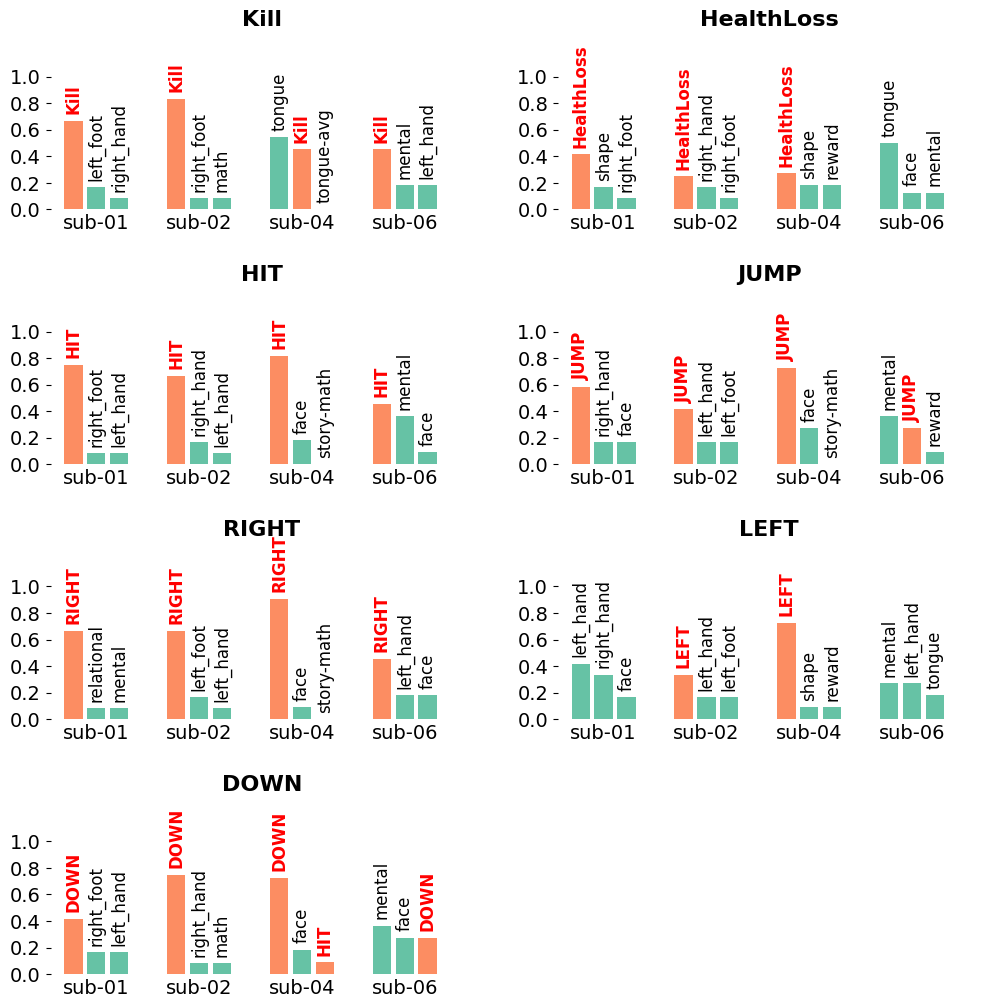

In [5]:
# Generate the DataFrame and plot the figure

data_rows = []
for idx_sub, sub in enumerate(['sub-01', 'sub-02', 'sub-04', 'sub-06']):
    anat_fname = op.join(
        path_to_data,
        "cneuromod.processed",
        "smriprep",
        sub,
        "anat",
        f"{sub}_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz",
    )

    decoder_fname = f'{sub}_simple_decoder.pkl'
    decoder_fpath = op.join(path_to_data, 'processed', 'mvpa_results_with_hcp', decoder_fname)
    
    with open(decoder_fpath, 'rb') as f:
        file = pickle.load(f)
        decoder = file['decoder']
        contrast_label = file['contrast_label']
        confusion_matrices_dict = file['confusion_matrices_dict']
        actual_per_class_accuracies = file['actual_per_class_accuracies']
        #permuted_per_class_accuracies = file['permuted_per_class_accuracies']
        completed_permutations = file['completed_permutations']
        #permuted_labels_list = file['permuted_labels_list']
        p_values = file['p_values']
        
    confusion_matrices_raw = confusion_matrices_dict['fold_confusions']

    # Define the desired order
    desired_order = ['Kill', 'HIT', 'RIGHT', 'DOWN', 'HealthLoss', 'JUMP', 'LEFT']

    # Loop over the desired order
    for annot_idx, annot in enumerate(desired_order):
        predictions_mat = []
        
        # Find the index of `annot` in `decoder.classes_` to access corresponding data
        annot_class_idx = np.where(decoder.classes_ == annot)[0][0]

        # Get data for this `annot`
        annot_mat = [confusion_matrices_raw[mat_idx][annot_class_idx, :] for mat_idx in range(len(confusion_matrices_raw))]
        stacked_annot_mat = np.vstack(annot_mat)
        summed_annot_preds = np.sum(stacked_annot_mat, axis=0)

        # Normalize predictions
        normalized_annot_preds = [x / np.sum(summed_annot_preds) for x in summed_annot_preds]

        # Find top 3 indices
        top_3_indices = np.array(normalized_annot_preds).argsort()[-3:][::-1]

        # Store data rows
        for top_idx, bar_idx in enumerate(top_3_indices):
            label = annot
            group = idx_sub
            prediction = top_idx
            value = normalized_annot_preds[bar_idx]
            xticklabel_group = sub
            bar_label = decoder.classes_[bar_idx]
            data_rows.append({
                'label': label,
                'group': group,
                'prediction': prediction,
                'value': value,
                'xticklabel_group': xticklabel_group,
                'bar_label': bar_label
            })



df = pd.DataFrame(data_rows)

# Create the plot without the legend
fig = create_plot(df)
plt.show()

/tmp/ipykernel_67964/2180098856.py:174: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


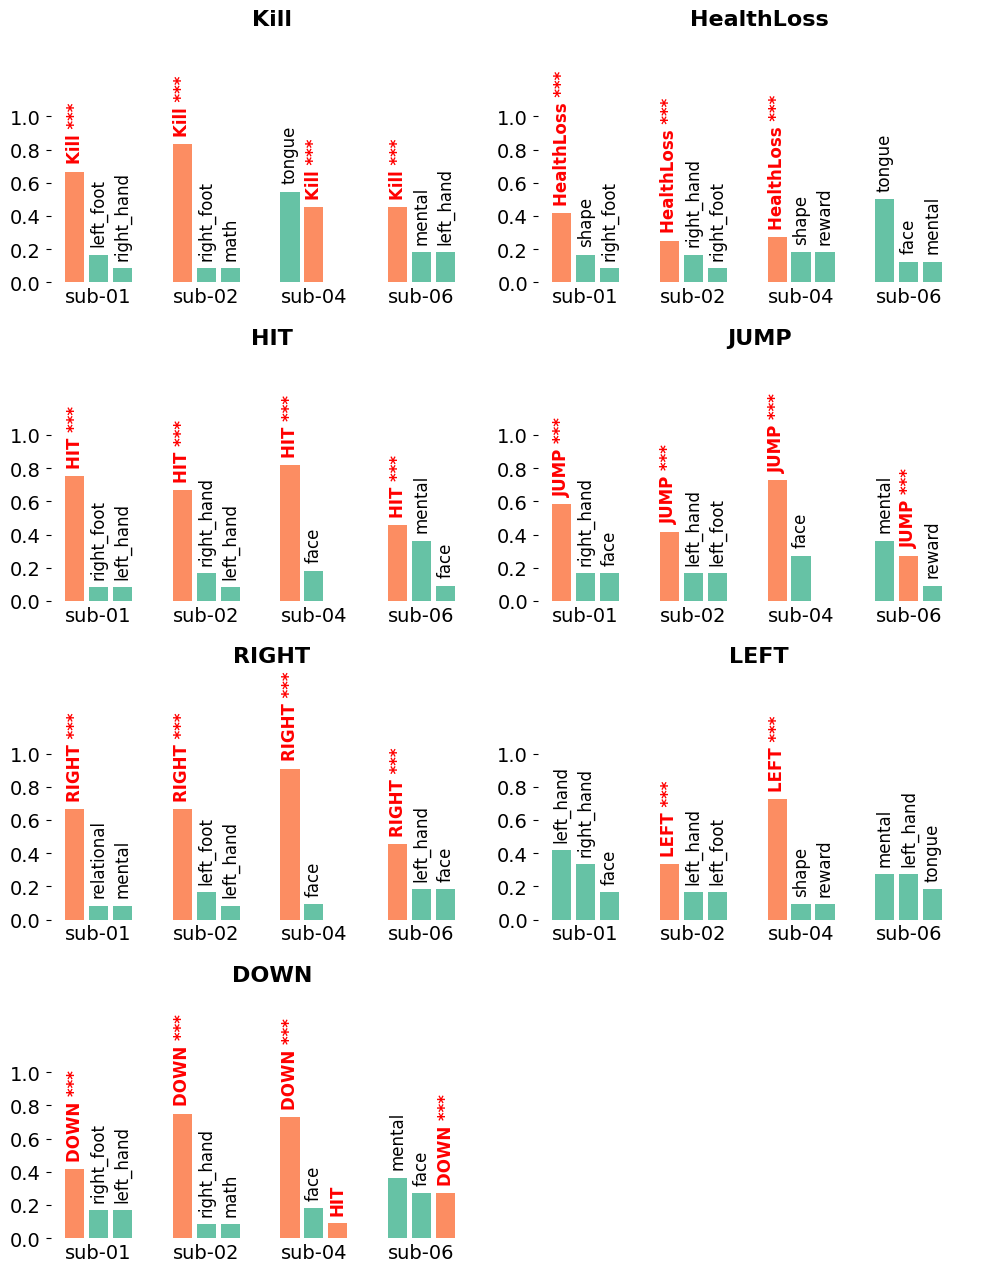

In [1]:
import os.path as op
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define constants
PATH_TO_DATA = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/'
SUBJECTS = ['sub-01', 'sub-02', 'sub-04', 'sub-06']
DESIRED_ORDER = ['Kill', 'HIT', 'RIGHT', 'DOWN', 'HealthLoss', 'JUMP', 'LEFT']
PALETTE = sns.color_palette("Set2")
TURQUOISE, ORANGE = PALETTE[0], PALETTE[1]


def load_decoder_data(subject):
    """
    Loads decoder data for a given subject.
    
    Parameters:
    - subject: str, subject identifier.
    
    Returns:
    - decoder: Loaded decoder object.
    - confusion_matrices_dict: Dictionary containing confusion matrices.
    - actual_per_class_accuracies: Actual per-class accuracies.
    - p_values: Dictionary mapping labels to p-values.
    """
    decoder_fname = f'{subject}_simple_decoder.pkl'
    decoder_fpath = op.join(PATH_TO_DATA, 'processed', 'mvpa_results_with_hcp', decoder_fname)
    
    with open(decoder_fpath, 'rb') as f:
        file = pickle.load(f)
    
    return file['decoder'], file['confusion_matrices_dict'], file['actual_per_class_accuracies'], file['p_values']


def prepare_data():
    """
    Loads and processes all subjects' data into a DataFrame.

    Returns:
    - df: pandas DataFrame containing processed data.
    - p_values: Dictionary mapping (subject, annotation) tuples to p-values.
    """
    data_rows = []
    p_values = {}

    for idx_sub, sub in enumerate(SUBJECTS):
        decoder, confusion_matrices_dict, _, subject_p_values = load_decoder_data(sub)

        # Store p-values with subject annotation as key
        for annot, p_val in subject_p_values.items():
            p_values[(sub, annot)] = p_val

        confusion_matrices_raw = confusion_matrices_dict['fold_confusions']

        for annot in DESIRED_ORDER:
            annot_class_idx = np.where(decoder.classes_ == annot)[0][0]
            annot_mat = np.array([confusion_matrices_raw[i][annot_class_idx, :] for i in range(len(confusion_matrices_raw))])
            summed_annot_preds = np.sum(annot_mat, axis=0)
            normalized_annot_preds = summed_annot_preds / np.sum(summed_annot_preds)
            top_3_indices = np.argsort(normalized_annot_preds)[-3:][::-1]

            for top_idx, bar_idx in enumerate(top_3_indices):
                data_rows.append({
                    'label': annot,
                    'group': idx_sub,
                    'prediction': top_idx,
                    'value': normalized_annot_preds[bar_idx],
                    'xticklabel_group': sub,  # Stores subject ID for later lookup
                    'bar_label': decoder.classes_[bar_idx]
                })

    return pd.DataFrame(data_rows), p_values


def create_bar_plot(ax, df_label, label, p_values):
    """
    Creates a single bar plot for a given label.

    Parameters:
    - ax: matplotlib Axes object to plot on.
    - df_label: DataFrame subset for the current label.
    - label: str, the label to plot.
    - p_values: Dictionary mapping (subject, annotation) tuples to p-values.
    """
    n_groups = df_label['group'].nunique()
    n_bars_per_group = df_label['prediction'].nunique()
    spacing = 1.5

    # Compute bar positions
    positions = [g * (n_bars_per_group + spacing) + b for g in range(n_groups) for b in range(n_bars_per_group)]

    # Sort data for consistency
    df_label_sorted = df_label.sort_values(['group', 'prediction'])
    heights = df_label_sorted['value'].values
    bar_labels = df_label_sorted['bar_label'].values
    subject_ids = df_label_sorted['xticklabel_group'].values  # Extract subject IDs

    # Assign colors
    bar_colors = [ORANGE if bar_label in DESIRED_ORDER else TURQUOISE for bar_label in bar_labels]

    # Plot bars
    bars = ax.bar(positions, heights, color=bar_colors, width=0.8)
    
    # Formatting
    ax.set_ylim(0, 1.2)
    ax.tick_params(axis='y', labelsize=14)

    # Add text annotations with significance markers
    for pos, height, bar_label, subject in zip(positions, heights, bar_labels, subject_ids):
        if height > 0:  # Only annotate bars that are visible
            color = 'red' if bar_label in DESIRED_ORDER else 'black'
            fontweight = 'bold' if color == 'red' else 'normal'

            # Check if this bar should have a significance marker
            significance_marker = ""
            if bar_label == label and (subject, label) in p_values:
                p_val = p_values[(subject, label)]
                if p_val < 0.001:
                    significance_marker = " ***"
                elif p_val < 0.01:
                    significance_marker = " **"
                elif p_val < 0.05:
                    significance_marker = " *"

            # Display annotation text above the bar
            ax.text(
                pos, height + 0.05, f"{bar_label}{significance_marker}",
                ha='center', va='bottom', fontsize=12, rotation=90,
                color=color, fontweight=fontweight
            )

    # Set x-ticks and labels
    xticks = [(g * (n_bars_per_group + spacing) + (n_bars_per_group - 1) / 2) for g in range(n_groups)]
    xticklabel_groups = df_label.drop_duplicates('group').sort_values('group')['xticklabel_group'].tolist()
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabel_groups, rotation=0, fontsize=14)
    ax.tick_params(axis='x', length=0)
    
    # Titles and formatting
    ax.set_title(label, fontsize=16, fontweight='bold', y=1.25)
    ax.set_xlim(-1, n_groups * (n_bars_per_group + spacing) - spacing + 1)
    ax.set_yticks(np.linspace(0, 1, num=6))

    for spine in ax.spines.values():
        spine.set_visible(False)


def create_plot(df, p_values):
    """
    Creates a grid of bar plots from the given DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing processed data.
    - p_values: Dictionary mapping labels to p-values.

    Returns:
    - fig: matplotlib Figure object.
    """
    labels = df['label'].unique()
    n_labels = len(labels)

    fig = plt.figure(figsize=(12, 15))
    gs = gridspec.GridSpec(4, 2, figure=fig, hspace=0.6, wspace=0.1)

    for idx, label in enumerate(labels):
        row, col = idx % 4, idx // 4
        ax = fig.add_subplot(gs[row, col])
        create_bar_plot(ax, df[df['label'] == label], label, p_values)

    plt.tight_layout()
    return fig


# Main Execution
df, p_values = prepare_data()
fig = create_plot(df, p_values)
plt.show()


In [23]:
data = load_decoder_data('sub-01')
data[2]


{'DOWN': 0.4166666666666667,
 'HIT': 0.75,
 'HealthLoss': 0.4166666666666667,
 'JUMP': 0.5833333333333334,
 'Kill': 0.6666666666666666,
 'LEFT': 0.0,
 'RIGHT': 0.6666666666666666,
 'cue': 0.26666666666666666,
 'effects_interest': 0.8666666666666667,
 'face': 0.8571428571428571,
 'face-shape': 0.14285714285714285,
 'left_foot': 0.8666666666666667,
 'left_foot-avg': 0.0,
 'left_hand': 0.5333333333333333,
 'left_hand-avg': 0.0,
 'match': 0.2857142857142857,
 'math': 0.8571428571428571,
 'math-story': 0.35714285714285715,
 'mental': 0.5333333333333333,
 'mental-random': 0.2,
 'punishment': 0.06666666666666667,
 'punishment-reward': 0.0,
 'random': 0.4,
 'relational': 0.7142857142857143,
 'relational-match': 0.5714285714285714,
 'reward': 0.4,
 'reward-punishment': 0.0,
 'right_foot': 0.9333333333333333,
 'right_foot-avg': 0.0,
 'right_hand': 0.5333333333333333,
 'right_hand-avg': 0.0,
 'shape': 0.9285714285714286,
 'shape-face': 0.21428571428571427,
 'story': 0.7142857142857143,
 'story-ma

<Axes: >

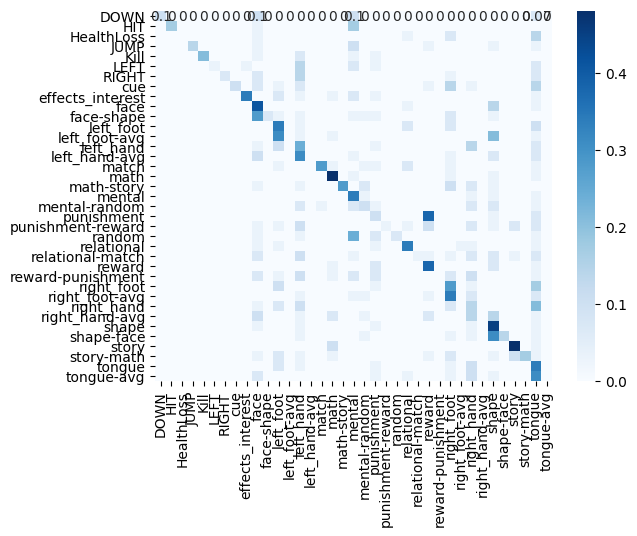

In [21]:
import seaborn as sns
averaged_confusion_matrix = np.round(np.mean(confusion_matrices_raw, axis=0), 2)
std_confusion_matrix = np.round(np.std(confusion_matrices_raw), 2)
sns.heatmap(averaged_confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=decoder.classes_, yticklabels=decoder.classes_)

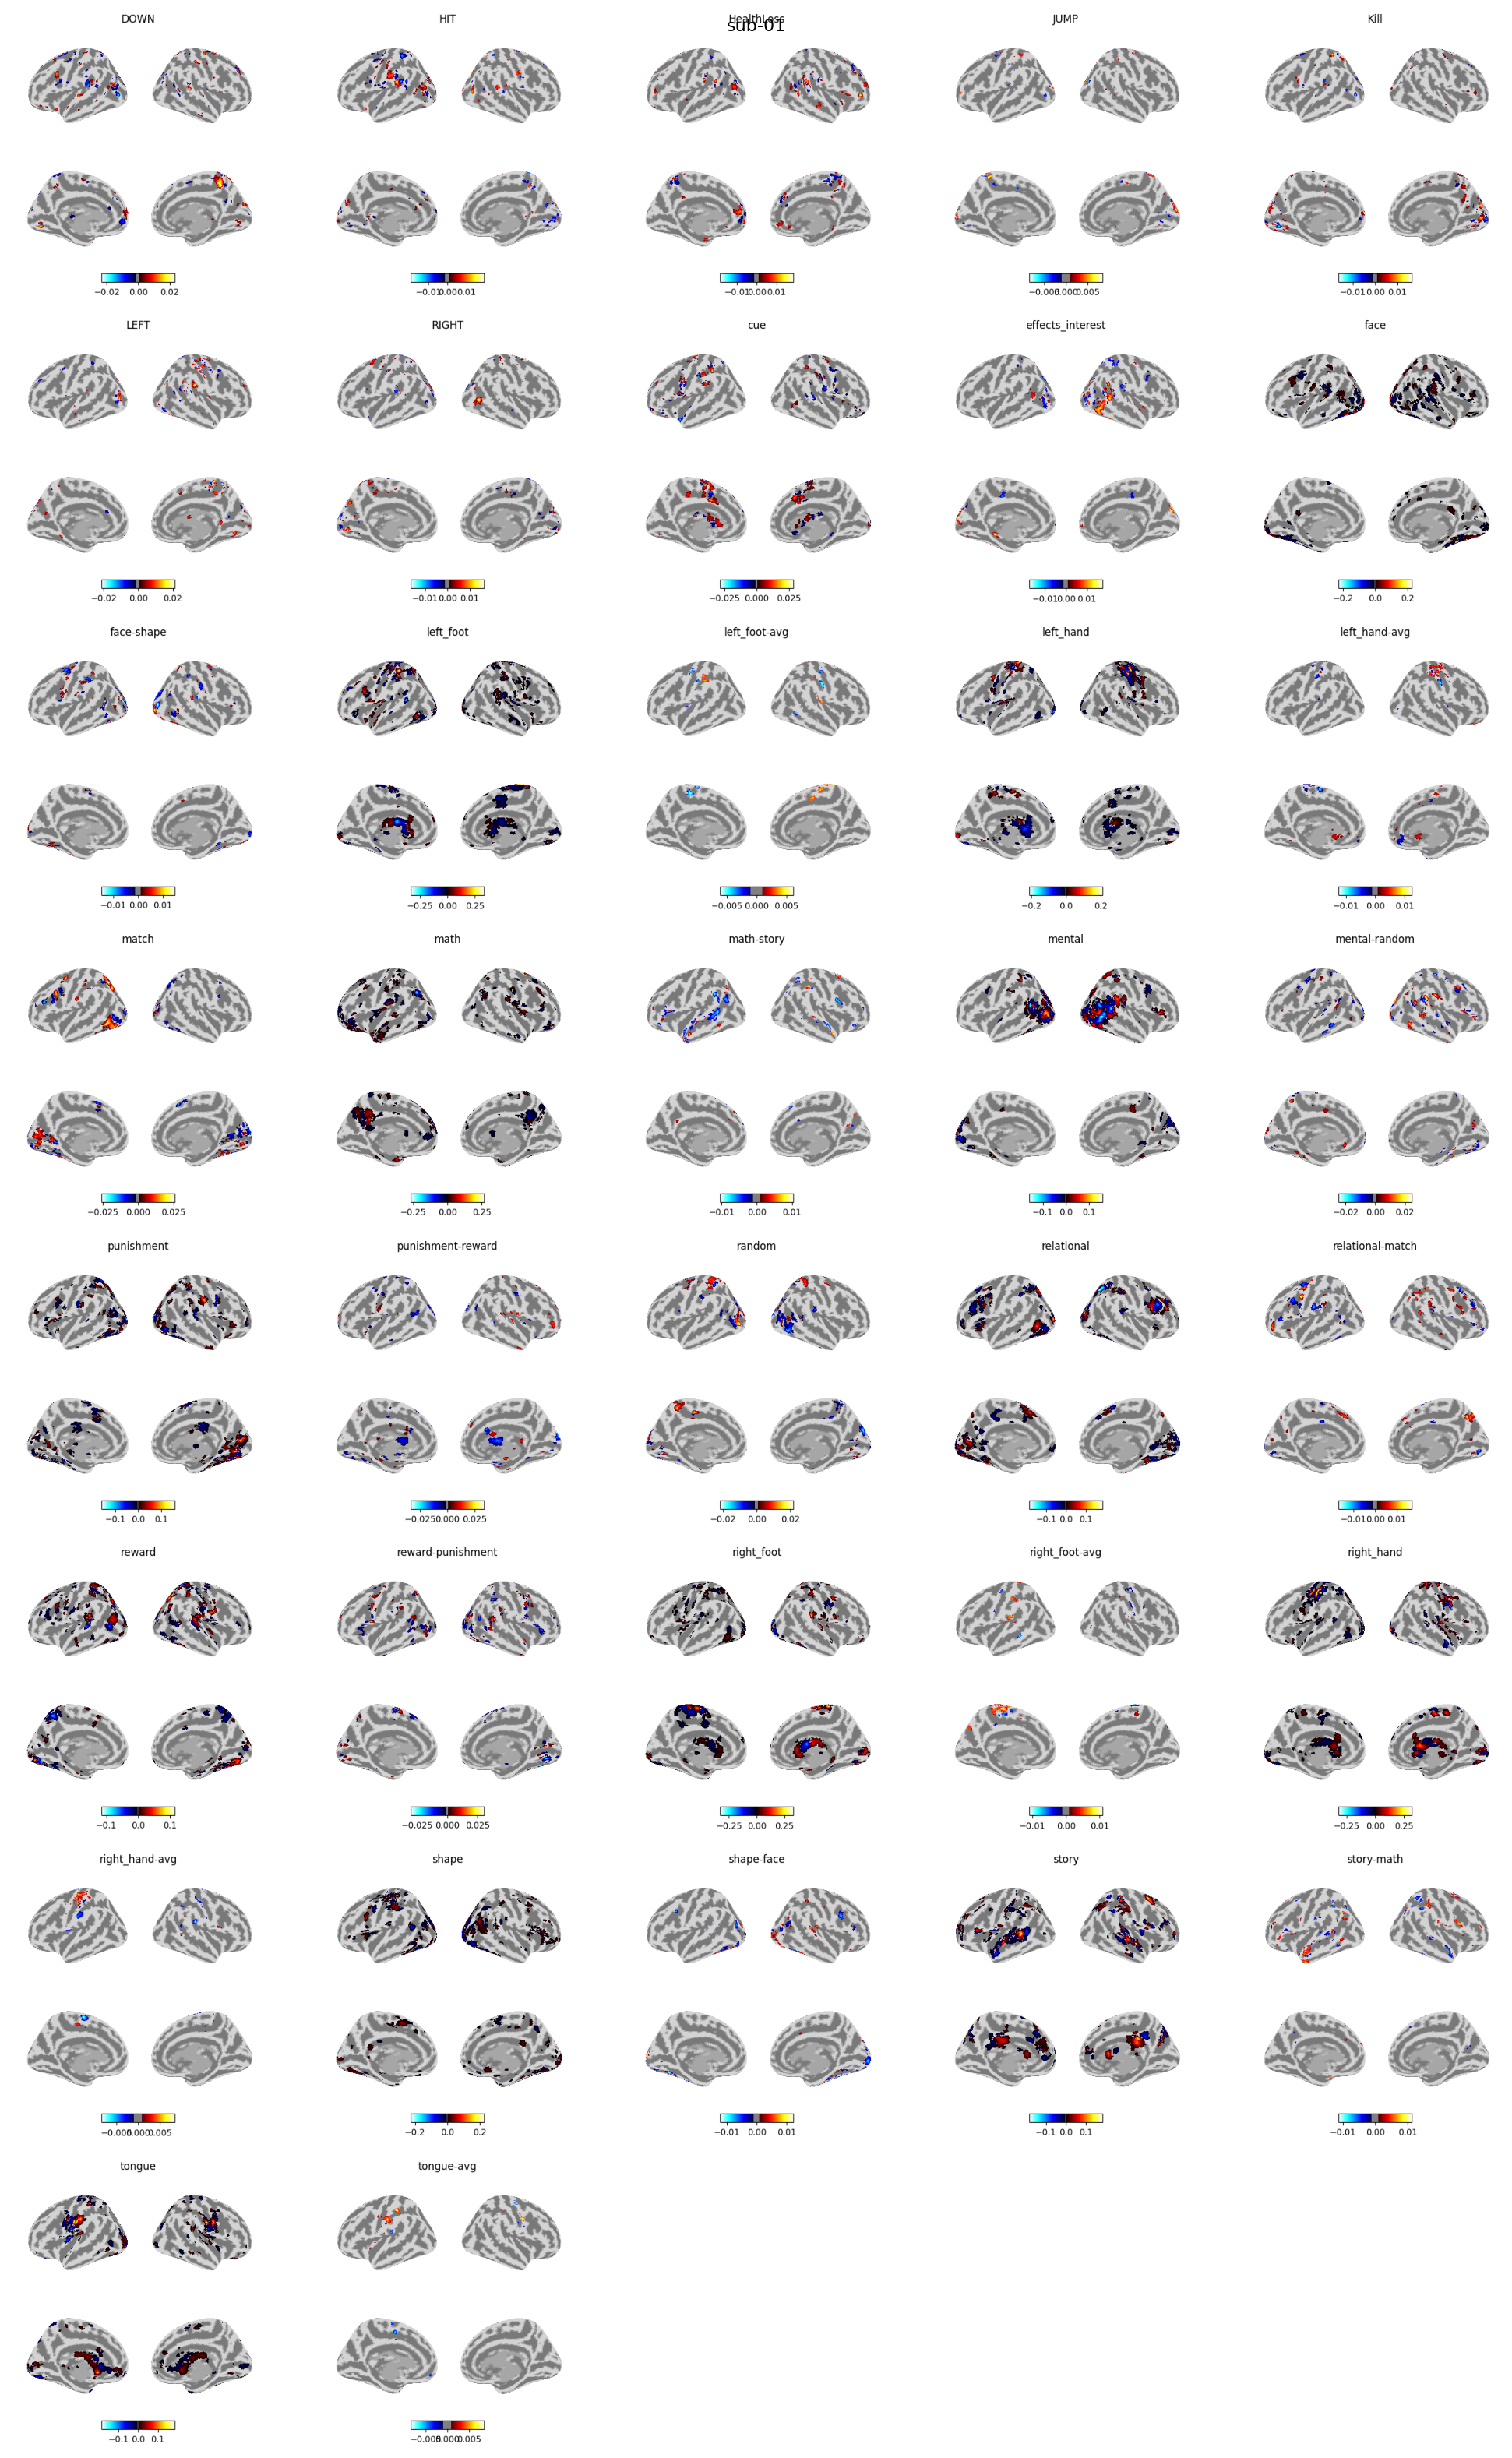

In [66]:
## Subject plot
import numpy as np
import matplotlib.pyplot as plt
import nilearn.plotting as plotting
import nilearn.image as image
import tempfile
import os
from matplotlib.image import imread

# Number of rows and columns for the grid
n_rows = 8
n_cols = 5

# Initialize grid for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 32))  # Adjust figsize as necessary

# Flatten the axes for easy iteration
axes = axes.ravel()

# Loop over conditions and generate temporary images
for idx, cond in enumerate(np.unique(contrast_label)):
    weight_img = decoder.coef_img_[cond]
    thresholded_weight_img = image.threshold_img(weight_img, threshold='80%', copy=True)

    # Create a temporary file to save the image
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
        output_file = tmpfile.name

    # Generate the surface plot and save it
    plotting.plot_img_on_surf(
        thresholded_weight_img,
        views=["lateral", "medial"],
        hemispheres=["left", "right"],
        inflate=True,
        symmetric_cbar=True,
        threshold=0.001,
        output_file=output_file,
        title=cond
    )

    # Load the saved image and plot it in the corresponding subplot
    img = imread(output_file)
    axes[idx].imshow(img)
    axes[idx].axis('off')  # Hide the axis for a clean look

    # Delete the temporary file after reading
    os.remove(output_file)

# Remove empty subplots if any (those beyond the number of conditions)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])  # Remove any unused subplot axes

# Adjust layout and show the multiplot
plt.tight_layout()
plt.show()


/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.1 when using version 1.0.2. This

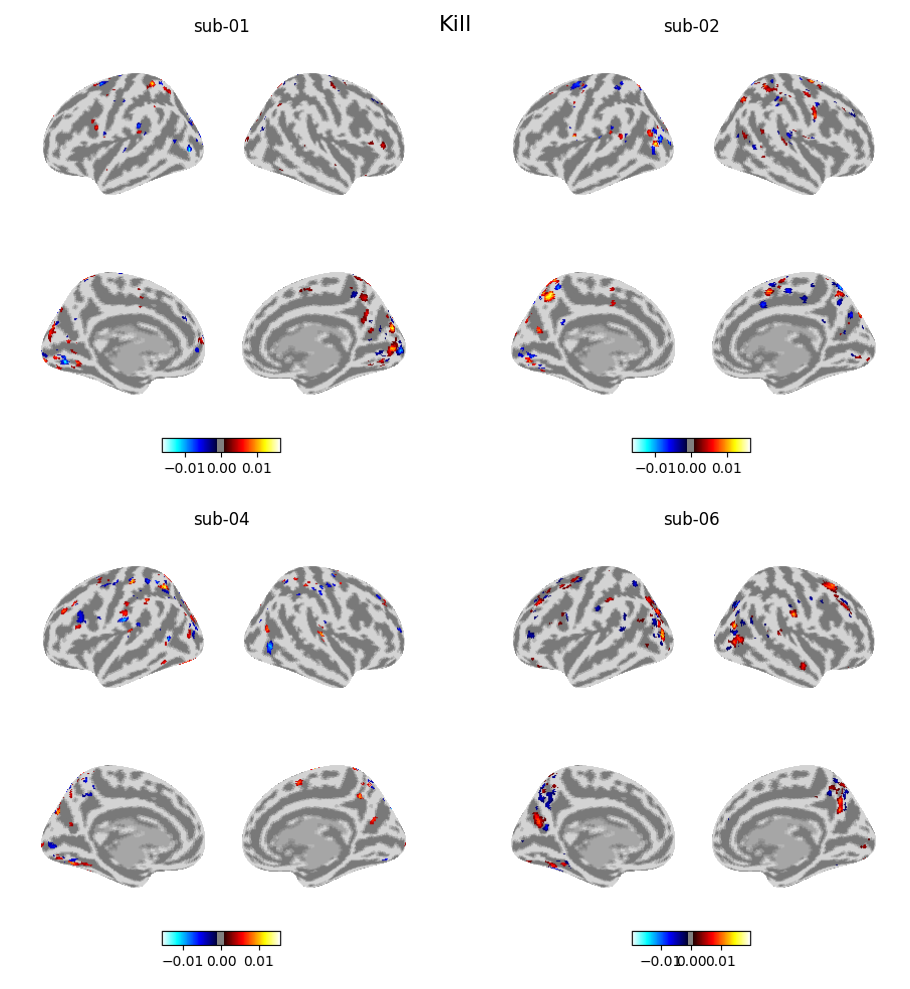

In [5]:
## Annotation plot
import numpy as np
import matplotlib.pyplot as plt
import nilearn.plotting as plotting
import nilearn.image as image
import tempfile
import os
from matplotlib.image import imread



# Number of rows and columns for the grid
n_rows = 2
n_cols = 2

# Initialize grid for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))  # Adjust figsize as necessary

# Flatten the axes for easy iteration
axes = axes.ravel()

cond = 'Kill'
for idx, sub in enumerate(['sub-01', 'sub-02', 'sub-04', 'sub-06']):
    anat_fname = op.join(
        path_to_data,
        "cneuromod.processed",
        "smriprep",
        sub,
        "anat",
        f"{sub}_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz",
    )

    decoder_fname = f'{sub}_simple_decoder.pkl'
    decoder_fpath = op.join(path_to_data, 'processed', 'mvpa_results_with_hcp', decoder_fname)

    with open(decoder_fpath, 'rb') as f:
        decoder = pickle.load(f)
        contrast_label = pickle.load(f)




    weight_img = decoder.coef_img_[cond]
    thresholded_weight_img = image.threshold_img(weight_img, threshold='80%', copy=True)

    # Create a temporary file to save the image
    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
        output_file = tmpfile.name

    # Generate the surface plot and save it
    plotting.plot_img_on_surf(
        thresholded_weight_img,
        views=["lateral", "medial"],
        hemispheres=["left", "right"],
        inflate=True,
        symmetric_cbar=True,
        threshold=0.001,
        output_file=output_file,
        title=sub
    )

    # Load the saved image and plot it in the corresponding subplot
    img = imread(output_file)
    axes[idx].imshow(img)
    axes[idx].axis('off')  # Hide the axis for a clean look

    # Delete the temporary file after reading
    os.remove(output_file)

# Adjust layout and show the multiplot
plt.tight_layout()
plt.suptitle(cond, fontsize=16)
plt.show()


In [1]:
import pandas as pd
import numpy as np
import shinobi_behav
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut
from nilearn.plotting import plot_stat_map, show
import argparse
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import os.path as op
import os

sub = "sub-01"

path_to_data = '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/' #shinobi_behav.DATA_PATH
models = ["simple"]
model = "simple"
CONDS_LIST = ['HIT', 'JUMP', 'DOWN', 'LEFT', 'RIGHT', 'Kill', 'HealthLoss']#, 'Kill', 'HealthLoss']#'HealthGain', 'UP']
#additional_contrasts = ['HIT+JUMP-RIGHT-LEFT-UP-DOWN', 'RIGHT+LEFT+UP+DOWN-HIT-JUMP']
contrasts = CONDS_LIST# + additional_contrasts



avg_matrices = []
std_matrices = []


for sub in shinobi_behav.SUBJECTS:
    mvpa_results_path = op.join(path_to_data, "processed", "mvpa_results_with_hcp")
    os.makedirs(mvpa_results_path, exist_ok=True)
    confusion_matrices_fname = f"{sub}_{model}_confusion_matrices.pkl"
    
    with open(op.join(mvpa_results_path, confusion_matrices_fname), 'rb') as f:
        confusion_matrices = pickle.load(f)
    print(confusion_matrices)
    averaged_confusion_matrix = np.mean(confusion_matrices, axis=0)
    std_confusion_matrix = np.std(confusion_matrices, axis=0)
    
    

/home/hyruuk/mambaforge/envs/shinobi/lib/python3.7/site-packages/nilearn/__init__.py:67: FutureWarning: Python 3.7 support is deprecated and will be removed in release 0.12 of Nilearn. Consider switching to Python 3.9 or 3.10.
  _python_deprecation_warnings()


FileNotFoundError: [Errno 2] No such file or directory: '/home/hyruuk/GitHub/neuromod/shinobi_fmri/data/processed/mvpa_results_with_hcp/sub-01_simple_confusion_matrices.pkl'

In [6]:
confusion_matrices[0].shape

(37, 37)

<AxesSubplot:>

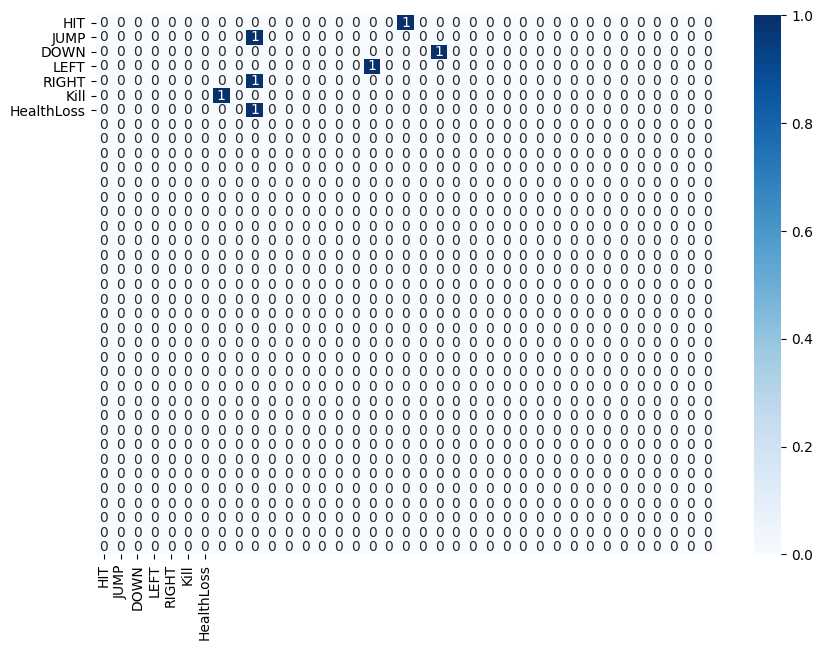

In [7]:
# Plotting the confusion matrix using seaborn heatmap, starting with the first one
plt.figure(figsize=(10,7))
sbn.heatmap(confusion_matrices[0], annot=True, cmap='Blues', xticklabels=contrasts, yticklabels=contrasts)

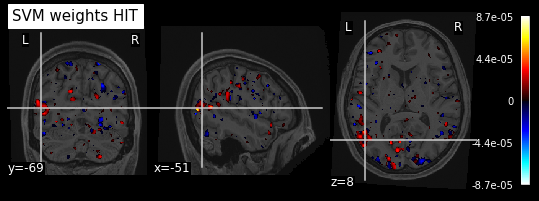

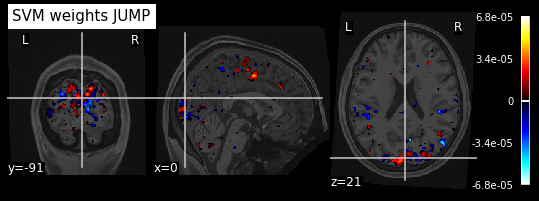

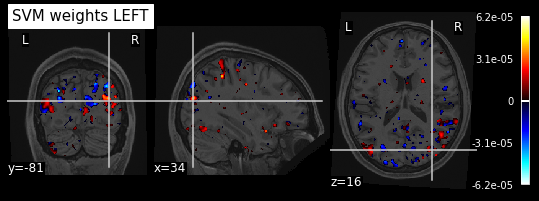

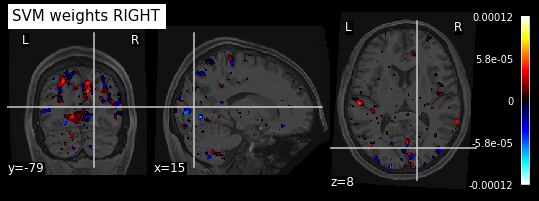

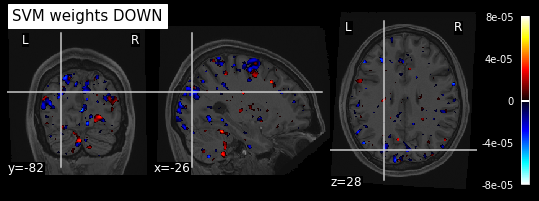

In [9]:
import matplotlib.pyplot as plt


for cond in ["HIT", "JUMP", "LEFT", "RIGHT", "DOWN"]:
    weight_img = decoder.coef_img_[cond]

    plot_stat_map(weight_img, bg_img=anat_fname, title=f"SVM weights {cond}")
    show()

In [17]:
import os
import os.path as op
import pandas as pd
import numpy as np
import shinobi_behav
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut
from nilearn.plotting import plot_stat_map, show
import argparse
from sklearn.metrics import confusion_matrix
import seaborn as sbn
import matplotlib.pyplot as plt
import pickle
import os.path as op
import os

parser = argparse.ArgumentParser()
parser.add_argument(
    "-s",
    "--subject",
    default=None,
    type=str,
    help="Subject to process",
)
args = parser.parse_args()

def main():
    path_to_data = shinobi_behav.DATA_PATH
    models = ["simple"]
    model = "simple"
    CONDS_LIST = ['HIT', 'JUMP', 'DOWN', 'LEFT', 'RIGHT', 'Kill', 'HealthLoss']#, 'Kill', 'HealthLoss']#'HealthGain', 'UP']
    #additional_contrasts = ['HIT+JUMP-RIGHT-LEFT-UP-DOWN', 'RIGHT+LEFT+UP+DOWN-HIT-JUMP']
    contrasts = CONDS_LIST# + additional_contrasts
    if args.subject is not None:
        subjects = [args.subject]
    else:
        subjects = shinobi_behav.SUBJECTS
    for sub in subjects:
        mvpa_results_path = op.join(path_to_data, "processed", "mvpa_results")
        os.makedirs(mvpa_results_path, exist_ok=True)
        confusion_matrices_fname = f"{sub}_{model}_confusion_matrices.pkl"
        if op.isfile(op.join(mvpa_results_path, confusion_matrices_fname)):
            with open(op.join(mvpa_results_path, confusion_matrices_fname), 'rb') as f:
                confusion_matrices = pickle.load(f)
        else:

            mask_fname = op.join(
                path_to_data,
                "cneuromod.processed",
                "smriprep",
                sub,
                "anat",
                f"{sub}_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz",
            )
            anat_fname = op.join(
                path_to_data,
                "cneuromod.processed",
                "smriprep",
                sub,
                "anat",
                f"{sub}_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz",
            )
            #for model in models:
            z_maps = []
            contrast_label = []
            session_label = []
            for contrast in contrasts:
                z_maps_fpath = op.join(path_to_data, "processed", "z_maps", "ses-level", contrast)
                for z_map_fname in os.listdir(z_maps_fpath):
                    if model in z_map_fname:
                        if sub in z_map_fname:
                            session = z_map_fname.split("_")[1]
                            z_maps.append(op.join(z_maps_fpath, z_map_fname))
                            contrast_label.append(contrast)
                            session_label.append(session)

            decoder = Decoder(estimator='svc', mask=mask_fname, standardize=False,
                            screening_percentile=5, cv=LeaveOneGroupOut(), n_jobs=-1, verbose=1)
            decoder.fit(z_maps, contrast_label, groups=session_label)

            classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
            chance_level = 1. / len(np.unique(contrast_label))
            print(f'Decoding : {sub} {model}')
            print('Classification accuracy: {:.4f} / Chance level: {}'.format(
                classification_accuracy, chance_level))
            
            for cond in contrasts:
                output_fname = op.join("./", "reports", "figures", "subject-level", cond, "MVPA", f"{sub}_{cond}_{model}_mvpa.png")
                os.makedirs(op.join("./", "reports", "figures", "subject-level", cond, "MVPA"), exist_ok=True)
                weight_img = decoder.coef_img_[cond]
                plot_stat_map(weight_img, bg_img=anat_fname, title=f"SVM weights {cond}", output_file=output_fname)

            # Generate confusion matrices across folds
            confusion_matrices = []
            for train, test in decoder.cv.split(z_maps, contrast_label, groups=session_label):
                decoder.fit(np.array(z_maps)[train], np.array(contrast_label)[train], groups=np.array(session_label)[train])
                y_pred = decoder.predict(np.array(z_maps)[test])
                y_true = np.array(contrast_label)[test]
                confusion_mat = confusion_matrix(y_true, y_pred, labels=decoder.classes_)
                confusion_matrices.append(confusion_mat)
        
            # Save confusion matrices
            with open(op.join(mvpa_results_path, confusion_matrices_fname), 'wb') as f:
                pickle.dump(confusion_matrices, f)

            # Plot confusion matrices
            averaged_confusion_matrix = np.mean(confusion_matrices, axis=0)
            std_confusion_matrix = np.std(confusion_matrices, axis=0)
            sbn.heatmap(averaged_confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=decoder.classes_, yticklabels=decoder.classes_)
            output_fname = op.join("./", "reports", "figures", "subject-level", "confusion_matrices", f"{sub}_{model}_averaged_confusion_matrix.png")
            os.makedirs(op.join("./", "reports", "figures", "subject-level", "confusion_matrices"), exist_ok=True)
            plt.savefig(output_fname)
            plt.close()
            sbn.heatmap(std_confusion_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=decoder.classes_, yticklabels=decoder.classes_)
            output_fname = op.join("./", "reports", "figures", "subject-level", "confusion_matrices", f"{sub}_{model}_std_confusion_matrix.png")
            plt.savefig(output_fname)
            plt.close()


if __name__ == "__main__":
    main()

usage: ipykernel_launcher.py [-h] [-s SUBJECT]
ipykernel_launcher.py: error: unrecognized arguments: --f=/home/hyruuk/.local/share/jupyter/runtime/kernel-v36d9612a43d519255b41bd19277d0bf6ab4e1d25e.json


SystemExit: 2

/home/hyruuk/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [37]:
sub = 'sub-06'
mvpa_results_path = op.join(shinobi_behav.DATA_PATH, "processed", "mvpa_results")
classes = ['DOWN', 'HIT', 'HealthLoss', 'JUMP', 'Kill', 'LEFT', 'RIGHT']


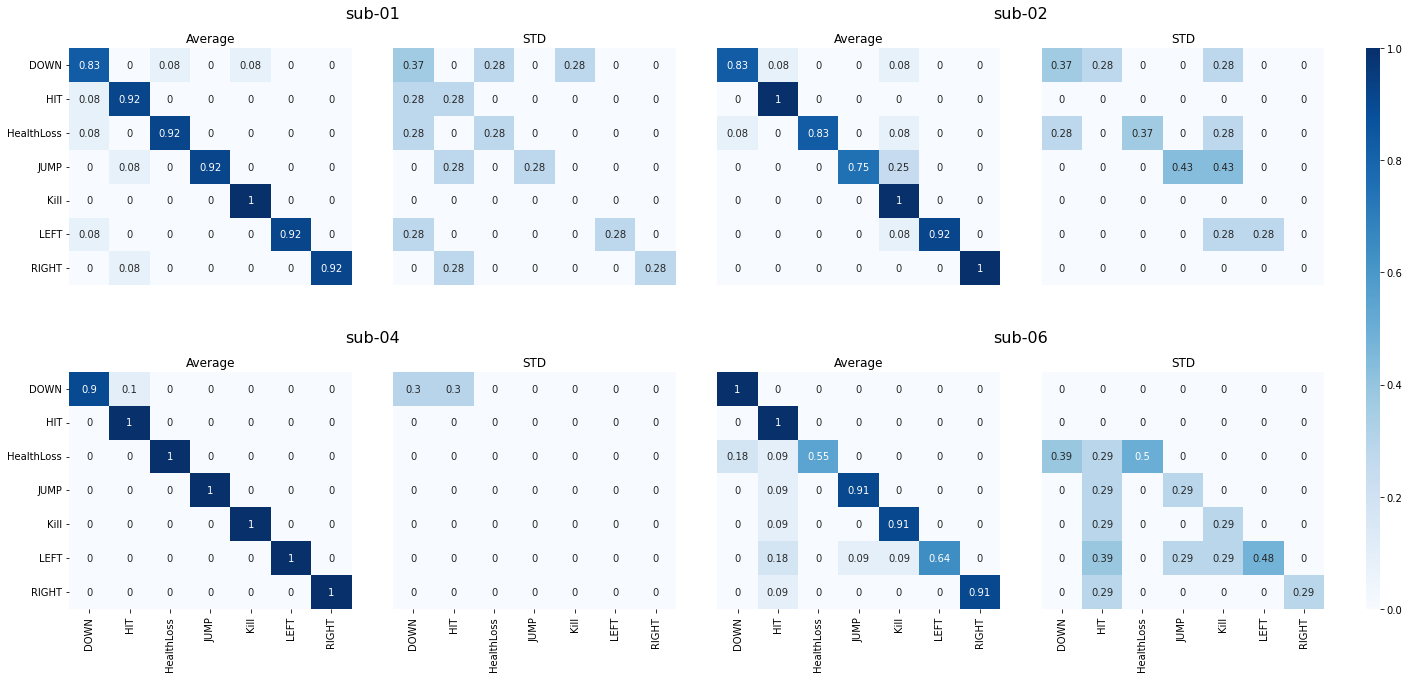

In [97]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# init figure
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(2, 5, width_ratios=[1, 1, 1, 1, 0.05])
# Flatten the grid of axes
axes = np.empty(shape=(0,))
for i in range(2):
    for j in range(4):
        ax = plt.subplot(gs[i, j])
        axes = np.append(axes, ax)
axes = np.ravel(axes)

ax_cbar = plt.subplot(gs[:,4])

# load and plot matrices
idx_plot = 0
for idx_sub, sub in enumerate(shinobi_behav.SUBJECTS):
    confusion_matrices_fname = f"{sub}_simple_confusion_matrices.pkl"
    # Load confusion matrices
    with open(op.join(mvpa_results_path, confusion_matrices_fname), 'rb') as f:
        confusion_matrices = pickle.load(f)
    averaged_confusion_matrix = np.round(np.mean(confusion_matrices, axis=0), decimals=2)
    std_confusion_matrix = np.round(np.std(confusion_matrices, axis=0), decimals=2)
    
    if idx_plot in [0,4]:
        ylabels = classes
    else:
        ylabels = []
    if idx_plot in [4,5,6,7]:
        xlabels = classes
    else:
        xlabels = []    
    
    sbn.heatmap(averaged_confusion_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[idx_plot], 
                vmin=0, vmax=1, cbar=None, xticklabels=xlabels, yticklabels=ylabels)
    axes[idx_plot].set_title('Average')
    idx_plot+=1
    sbn.heatmap(std_confusion_matrix, annot=True, cmap='Blues', fmt='g', ax=axes[idx_plot], 
                vmin=0, vmax=1, cbar_ax=ax_cbar, xticklabels=xlabels, yticklabels=[])
    axes[idx_plot].set_title('STD')
    idx_plot+=1
    
    # Add subject name
    ax_subj = fig.add_subplot(gs[idx_sub//2, idx_sub%2*2:idx_sub%2*2+2], frame_on=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax_subj.set_title(sub, fontsize=16, y=1.1)
    
    
plt.tight_layout()